### Jared Connolly
###### Perm ID: 4775391

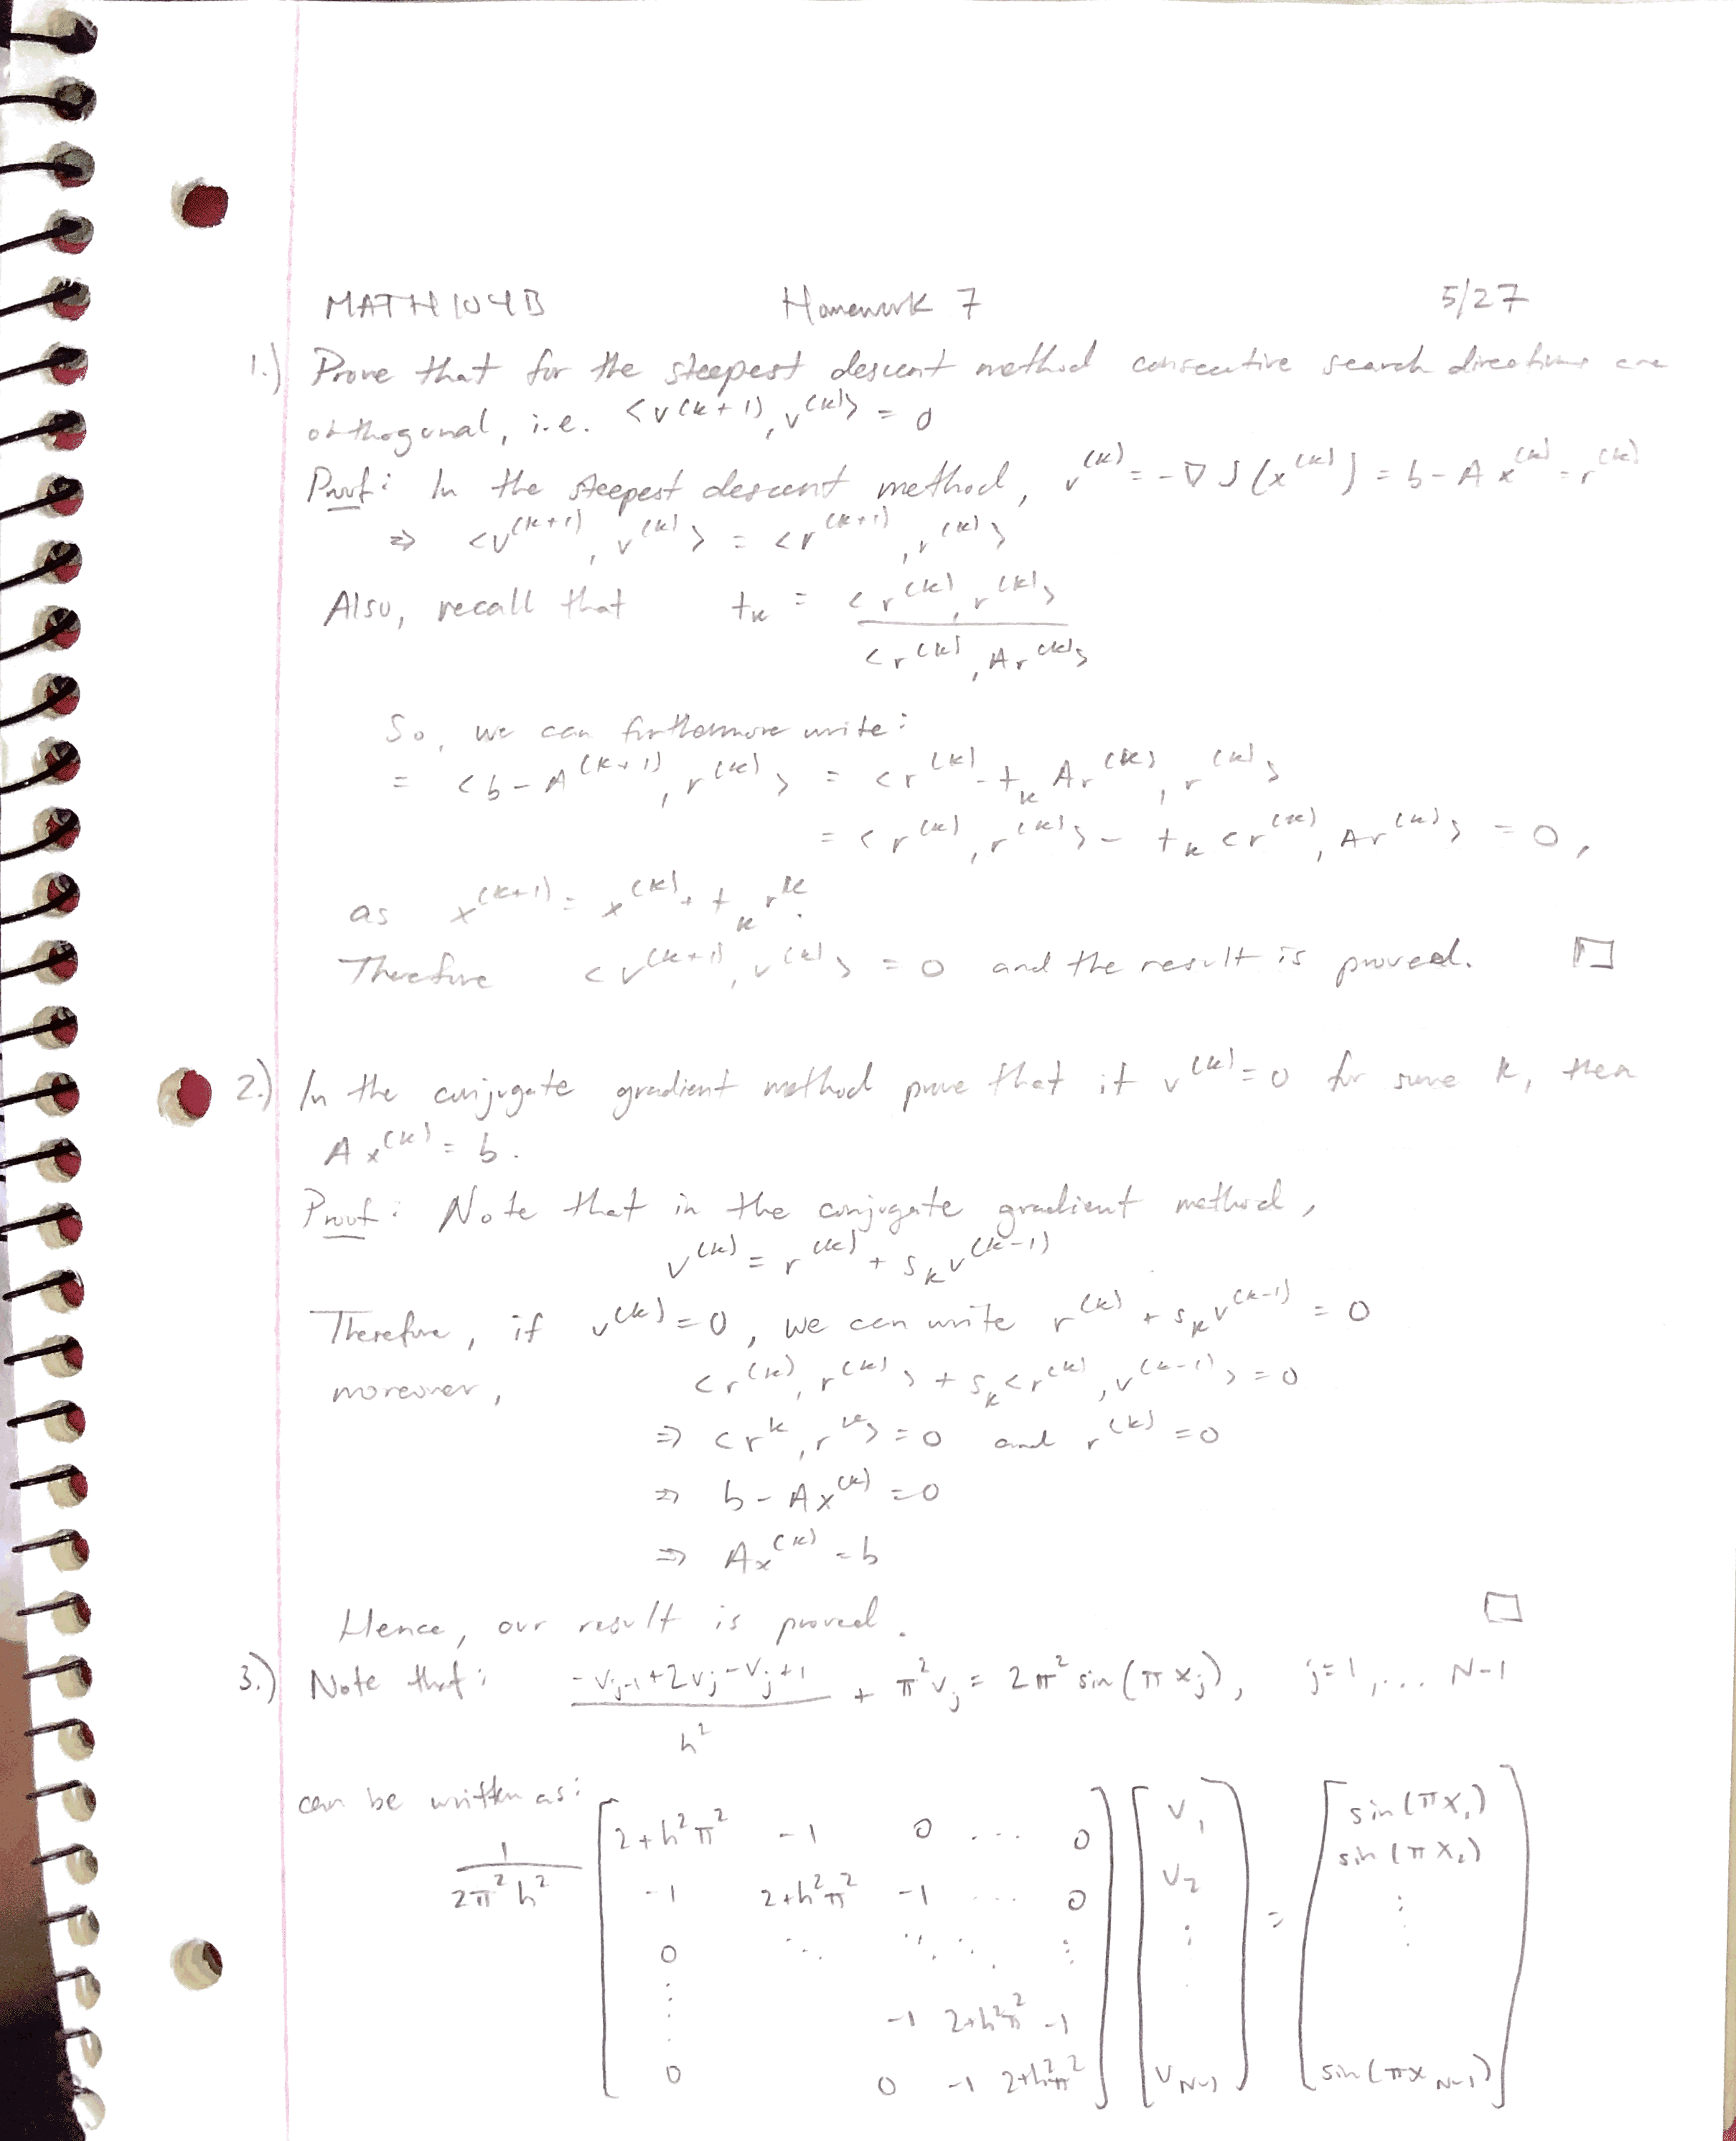

In [6]:
#Q 3/4

from numpy import zeros, linspace, sin, dot, concatenate
from numpy.linalg import norm
from time import time
from math import pi
import matplotlib.pyplot as plt


# Ax 
def tri(A,x): #input x, A tridiagonal
    Ax = zeros(x.size)
    Ax[0] = A[0,0]*x[0] + A[0,1]*x[1]
    Ax[-1] = A[-1,-1]*x[-1] + A[-1,-2]*x[-2]
    for i in range(1,len(Ax) - 1):
        Ax[i] = A[i,i-1]*x[i-1] + A[i,i]*x[i] + A[i,i+1]*x[i+1]
    return Ax # output

# Now to define the matrix of the boundary value problem
def bvp(N): # input N
    h = 1/N
    A = zeros((N - 1, N - 1))
    for i in range(0, N - 1):
        A[i,i] = 2 + h**2*pi**2
        if i > 0:
            A[i, i - 1] = -1
            A[i - 1, i] = -1
    A *= 1/2/h**2/pi**2
    return A # output matrix A 

# Conjugate gradient method
def cgm(N): # input N
    TOL = N**(-2) # tolerance to be h^2
    x = zeros(N - 1)
    b = sin( pi*linspace(0,1,N+1)[1:-1] ) 
    A = bvp(N)
    tri1 = lambda y: tri(A,y)
    r = b - tri1( x )
    v = r
    k = 0
    while norm(r) > TOL:
        av = tri1(v)
        t = dot(r,r)/dot(v,av)
        x += t*v
        r_p = r.copy()
        r -= t*av
        s = dot(r,r)/dot(r_p,r_p)
        v *= s
        v += r
        k += 1
    print('%i iterations for N = %i' % (k,N))
    return x # output the approximate solution 

In [7]:
# Conjugate gradient method solutions
n = [50,100,200]

x = [linspace(0,1,N + 1) for N in n]
u = [sin(pi*y) for y in x]
v = [concatenate([[0],cgm(N),[0]]) for N in n]
errors = []

for i in range(0,len(n)):
    errors.append(norm(u[i]-v[i]))

print('Error for N = 50,100,200 respectively = ', errors)

1 iterations for N = 50
1 iterations for N = 100
1 iterations for N = 200
Error for N = 50,100,200 respectively =  [0.0008224940857948437, 0.00029078839981457885, 0.00010280859056520481]


The results quickly converge to the solution with TOL in the conjugate gradient method. When N=50, 100 and 200, we only need 1 iteration to get a good enough approximation. When we double the value of N, the error becomes 4 times smaller. This is expected as we set the tolerance to h^2 (order of error from BVP) and the expected error is O(h^2).

In [8]:
# Jacobi's method 
def jacobi(N): # input N
    A = bvp(N)
    TOL = N**(-2)
    tri1 = lambda y: tri(A,y)
    x = zeros(N - 1)
    b = sin(pi*linspace(0,1,N + 1)[1:-1])
    k = 0
    kmax = 1e6 # max number of iterations
    while norm(b - tri1(x)) > TOL and k < kmax:
        x[0] = (b[0] - A[0,1]*x[1])/A[0,0]
        x[-1] = (b[-1] - A[-1,-2]*x[-2])/A[-1,-1]
        for i in range(1, len(x) - 1):
            x[i] = (b[i] - A[i,i - 1]*x[i - 1] - A[i,i + 1]*x[i + 1])/A[i,i]
        k += 1
    print('%i iterations for N = %i' % (k,N))
    return x # output approximate solution

In [9]:
# Jacobi's method solutions
n = [50,100,200]

x = [linspace(0,1,N + 1) for N in n]
u = [sin(pi*y) for y in x]
v = [concatenate([[0],jacobi(N),[0]]) for N in n]
errors = []

for i in range(0,len(n)):
    errors.append(norm(u[i]-v[i]))

print('Error for N = 50,100,200 respectively = ', errors)

1196 iterations for N = 50
5659 iterations for N = 100
26141 iterations for N = 200
Error for N = 50,100,200 respectively =  [0.00042464748248321923, 0.00019107180583290354, 7.782142728625973e-05]


For the Jacobi method, we see that it takes many more iterations (iterations increase rapidly as  N increases), yet we are able to arrive at the same result. Hence the performance of the conjugate gradient method better than Jacobi. 